# About
## Applying Donut to read imgs

Reads contents of the img

https://github.com/clovaai/donut

https://huggingface.co/docs/transformers/main/en/model_doc/donut

https://github.com/NielsRogge/Transformers-Tutorials/blob/master/Donut/CORD/Quick_inference_with_DONUT_for_Document_Parsing.ipynb


In [1]:
from platform import python_version
print(python_version())

3.12.4


In [3]:
import re
from transformers import DonutProcessor, VisionEncoderDecoderModel
import torch
import json
from PIL import Image

In [2]:
import torch

In [6]:
processor = DonutProcessor.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")
model = VisionEncoderDecoderModel.from_pretrained("naver-clova-ix/donut-base-finetuned-cord-v2")

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

config.json:   0%|          | 0.00/4.74k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/806M [00:00<?, ?B/s]

VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0-1): 2 x DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
           

In [70]:
img_path = 'data/sample_invoice.png'
sample_invoice = Image.open(img_path)


In [73]:
sample_invoice = sample_invoice.convert('RGB')

In [19]:
!pip install opencv-python

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 264.8 kB/s eta 0:00:00m eta 0:00:010:00:06

[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [20]:
!pip install -q datasets sentencepiece

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)



[notice] A new release of pip is available: 24.0 -> 24.1
[notice] To update, run: pip install --upgrade pip


In [21]:

from datasets import load_dataset

dataset = load_dataset("hf-internal-testing/example-documents")

Generating test split:   0%|          | 0/3 [00:00<?, ? examples/s]

In [43]:
image = dataset['test'][2]['image']

In [62]:
dataset['test'][2]

{'image': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=576x864>}

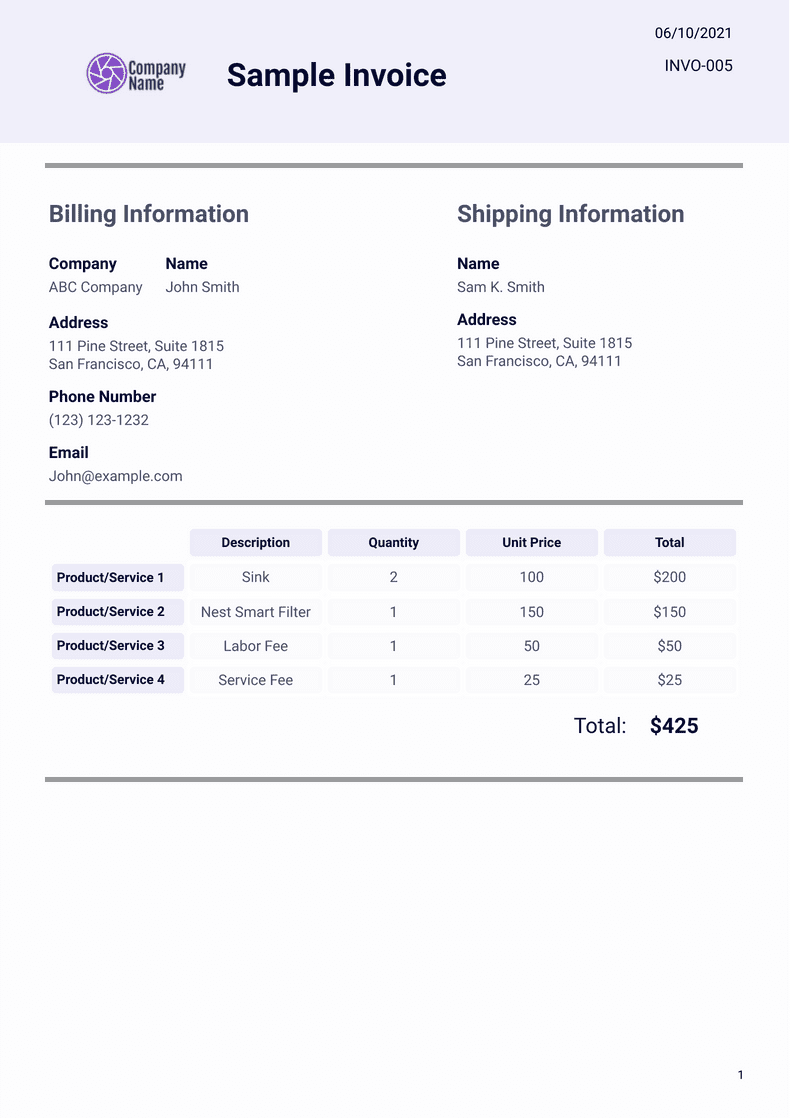

In [53]:
sample_invoice

In [74]:
sample_invoice_pixels = list(sample_invoice.getdata())
sample_invoice_pixels

[(240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239, 250),
 (240, 239

In [75]:
# prepare decoder inputs
task_prompt = "<s_cord-v2>"
decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt").input_ids

pixel_values = processor(sample_invoice, return_tensors="pt").pixel_values

outputs = model.generate(
    pixel_values.to(device),
    decoder_input_ids=decoder_input_ids.to(device),
    max_length=model.decoder.config.max_position_embeddings,
    pad_token_id=processor.tokenizer.pad_token_id,
    eos_token_id=processor.tokenizer.eos_token_id,
    use_cache=True,
    bad_words_ids=[[processor.tokenizer.unk_token_id]],
    return_dict_in_generate=True,
)

sequence = processor.batch_decode(outputs.sequences)[0]
sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()  # remove first task start token


In [76]:
print(processor.token2json(sequence))

{'menu': [{'nm': 'Company Sample Invoice', 'num': '06/10/2021', 'price': 'INVO-005'}, {'nm': 'Billing Information', 'num': 'Shipping Information'}, {'nm': '11 Pine Street Suite 1815', 'num': 'San Francisco, CA, 94111', 'price': '1111'}, {'nm': 'Phone Number', 'num': '(123) 123-1232', 'price': '(RIA)'}], 'sub_total': {'subtotal_price': {'price': 'Total'}, 'discount_price': '$200', 'service_price': '$150', 'tax_price': '$50', 'etc': '1'}, 'total': {'total_price': '25', 'emoneyprice': '$425', 'menuqty_cnt': '4'}}
